# **Final Project 3 - Ensemble (Random Forest and Boosting)**

Nama        : Afwa Afini <br>
KMI Batch   : 5 <br>

## A. Perkenalan

### 1.1 Latar Belakang 



Penyakit gagal jantung merupakan masalah serius dalam kesehatan yang sangat berdampak berbagai negara. Dengan dataset klinis yang digunakan dalam projek ini akan menjadi sumber informasi terkait kondisi kesehatan beberapa pasien yang memiliki potensi risiko terkena gagal jantung. Dataset ini membagi informasi antara pasien yang telah mengalami gagal jantung dan pasien yang tidak mengalami gagal jantung, tentunya merepresentasikan dua kelas yang dapat diprediksi. Data kali ini, tidak hanya mencakup paramater soal medis seperti usia, riwayat penyakit, dsb. Tetapi juga memberikan gambaran menyeluruh terkait faktor-faktor lain yang mungkin berperan dalam prediksi terkena gagal jantung.

Dengan menggunakan teknik Ensemble Model ini dapat menghasilkan prediksi yang akurat terkait kemungkinan potensi terkena gagal jantung pada pasien-pasien terkait. Melalui analisis yang mendalam agar dapat membangun sebuah model prediksi yang dapat memberikan wawasan yang mendalam tentang bagaimana variabel-variabel tertentu dapat mempengaruhi risiko gagal jantung pada setiap pasien. Sehingga, hasil prediksi ini dapat menjadi manfaat bagi praktisi kesehatan untuk mendeteksi risiko secara dini, memberikan perawatan yang lebih terfokus, dan memaksimalkan upaya pencegahan terkena gagal jantung.

Projek ini memiliki potensi besar untuk memberikan pemahaman terhadap gagal jantung, tidak hanya sebagai penyakit tetapi juga sebagai hasil interaksi berbagai faktor kesehatan pada setiap individu. Dengan pendekatan yang kuat terhadap data ini melalui teknik Ensemble Model melalui Random Forest, diharapkan dapat memberikan kontribusi yang signifikan dalam upaya pencegahan dan pengelolaan penyakit yang serius ini.

Random Forest: Random forest adalah metode pembelajaran ensemble yang menggabungkan beberapa decision tree untuk membuat model yang kuat. Metode ini bekerja dengan membangun sejumlah besar decision tree pada subset acak dari data dan kemudian menggabungkan prediksi dari setiap pohon secara agregat. Random forest dapat digunakan untuk memprediksi kemungkinan kematian akibat gagal jantung dengan mempertimbangkan berbagai faktor risiko yang ada dalam data heart failure.

### 1.2 Data yang digunakan 
Pada analisa data kali ini kita menggunakan data Heart Failure Prediction yang diambil pada kaggel "https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data". Pada terdiri dari 13 kategori yaitu :

1. age - umur pasien
2. anaemia - apakah ada pengurangan haemoglobin
3. creatinine_phosphokinase - level enzim CPK dalam mcg/L
4. diabetes - apakah pasien punya riwayat diabetes
5. ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi
    di setiap kontraksi jantung
6. high_blood_pressure - apakah pasien punya darah tinggi
7. platelets - jumlah platelet di darah dalam kiloplatelets/mL
8. serum_creatinine - level serum creatinine di darah dalam mg/dL
9. serum_sodium - level serum sodium di darah dalam mEq/L
10. sex - apakah pasien pria atau wanita
11. smoking - apakah pasien merokok
12. time - waktu dalam hari untuk follow-up
13. DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up

### 1.3 Objectiv

Adapun objective yang ingin diacapai yaitu :
Prediksi keselamatan pasien dari penyakit jantung menggunakan berbagai model.

## B. Import Pustaka

In [1]:
# Import Library
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from scipy import stats
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn import metrics

## C. Data Loading

Upload dataset yang telah di download dari kaggel dengan format csv


In [2]:
# import data --> data yang diimport format csv
data_df = pd.read_csv ("heart_failure_clinical_records_dataset.csv")
data_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
# bentuk dimensi dataset yang menerangkan jumlah data dan  kategori
data_df.shape 

(299, 13)

In [4]:
# type data tiap kolom
data_df.dtypes 

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [5]:
# memberikan ringkasan tentang dataset, termasuk jumlah data, tipe data kolom, dan penggunaan memori.
data_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


## D. Data Cleaning

In [6]:
unique_counts = data_df.nunique()
unique_counts_df = pd.DataFrame({'Column': unique_counts.index, 'Unique Counts': unique_counts.values})
print(unique_counts_df)

                      Column  Unique Counts
0                        age             47
1                    anaemia              2
2   creatinine_phosphokinase            208
3                   diabetes              2
4          ejection_fraction             17
5        high_blood_pressure              2
6                  platelets            176
7           serum_creatinine             40
8               serum_sodium             27
9                        sex              2
10                   smoking              2
11                      time            148
12               DEATH_EVENT              2


In [7]:
# Identifikasi missing value
data_df.isnull()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,False,False,False,False,False,False,False,False,False,False,False,False,False
295,False,False,False,False,False,False,False,False,False,False,False,False,False
296,False,False,False,False,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
data_df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

## E. Explorasi Data

In [9]:
data_df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### 5.1 Numerical Fitur

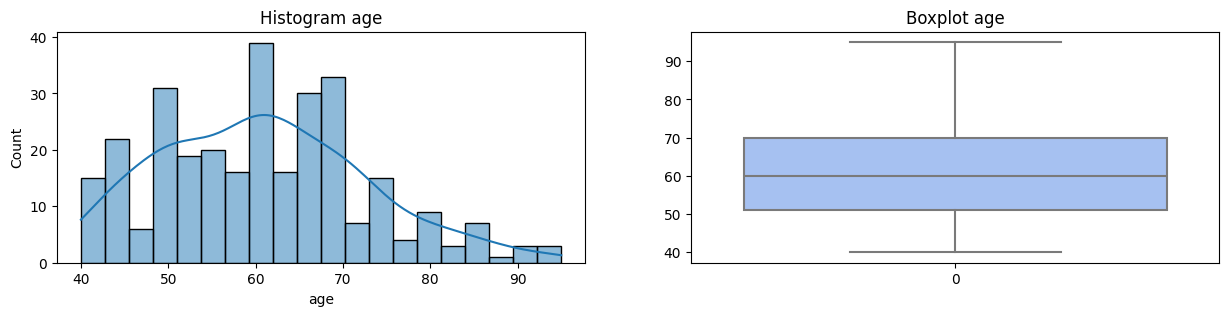

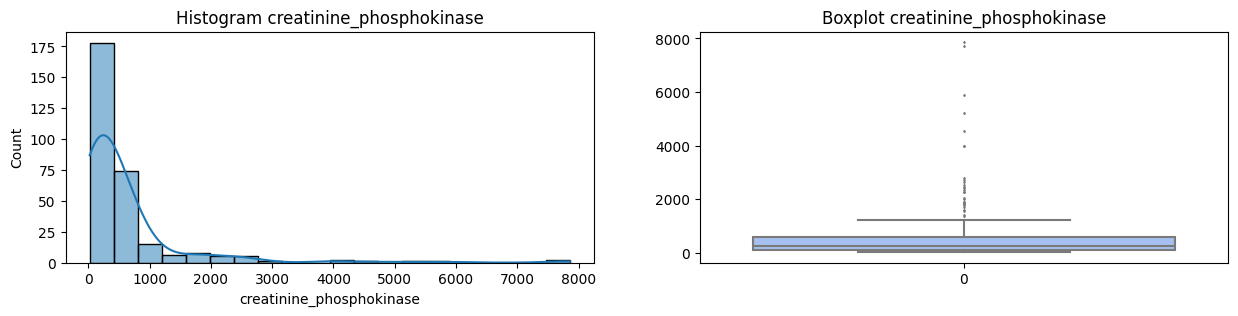

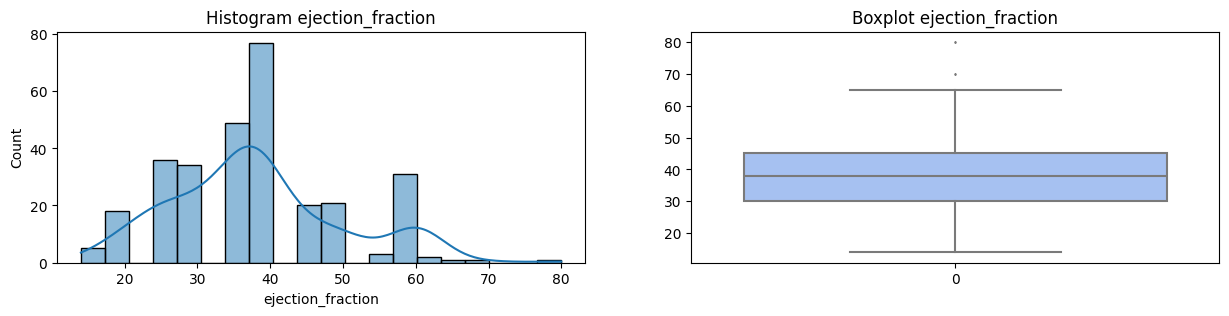

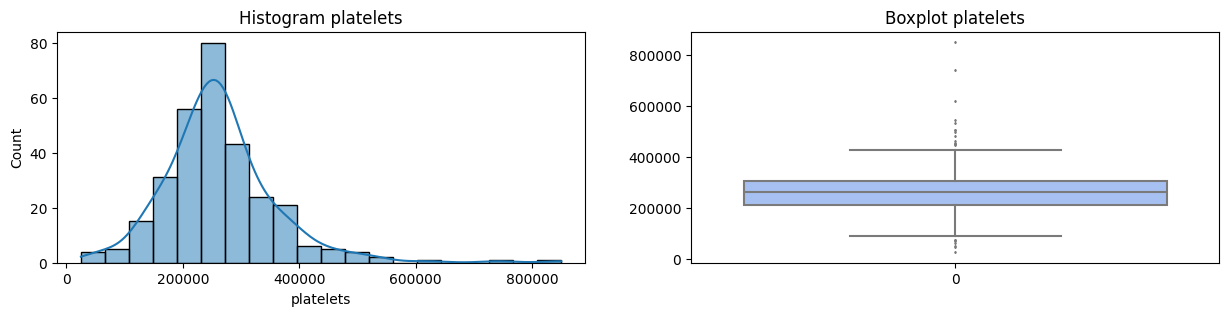

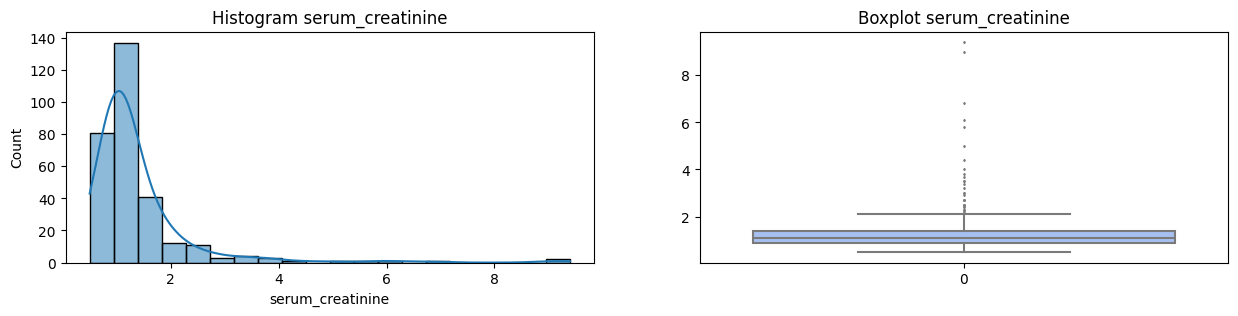

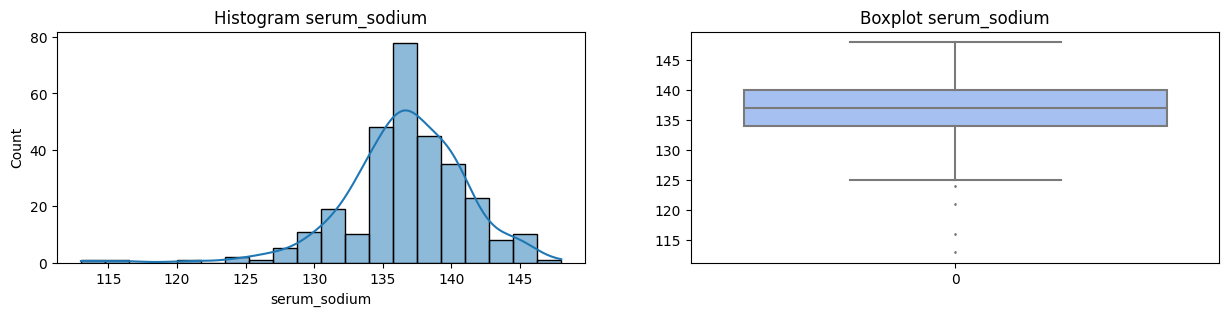

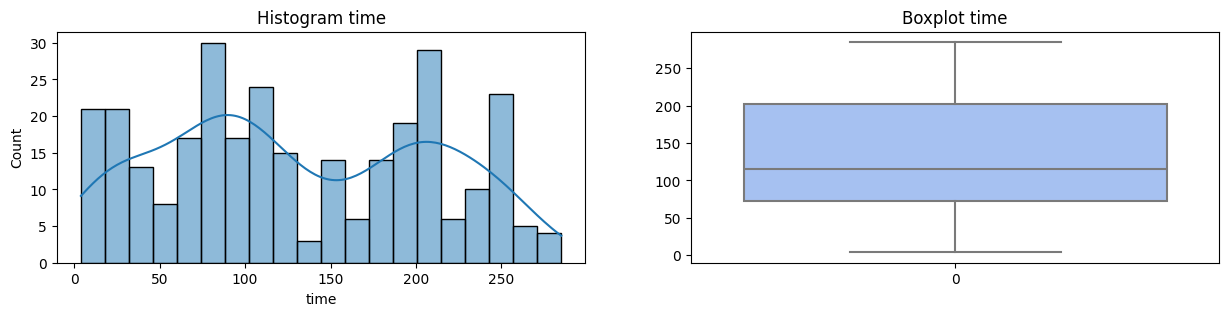

In [10]:
num_col = ["age", "creatinine_phosphokinase", "ejection_fraction", 
           "platelets", "serum_creatinine", "serum_sodium", "time"]

for i in num_col:
    fig, axs = plt.subplots(1, 2, figsize=(15, 3))

    # Histogram
    sns.histplot(data_df[i], bins=20, kde=True, ax=axs[0])
    axs[0].set_title(f'Histogram {i}')

    # Boxplot
    sns.boxplot(data_df[i], ax=axs[1], color='#99befd', fliersize=1)
    axs[1].set_title(f'Boxplot {i}')

    # Menampilkan grafik
    plt.show()

Berdasarkan visualisasi di atas dapat diketahui bahwa hampir semua variabel memiliki outliers.Keberadaan outlier dapat mempengaruhi analisis statistik dan interpretasi hasil secara signifikan. Untuk itu kami akan melakukan penanganan pada fitur-fitur yang memiliki outlier. unutk variabel yang digunakan yaitu yang mempunyai nilai bervariasi sehingga terdapat 7 kategori yaitu (age","creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time").

### 5.3 Boolean Fitur

pada data dibawah ini kita menggunakan boolean , menggunakan boolean atau variabel biner sangat umum dalam analisis data, terutama dalam konteks klasifikasi di mana kita ingin memprediksi atau mengkategorikan suatu hasil sebagai "ya" atau "tidak," "1" atau "0," atau "positif" atau "negatif." Variabel biner hanya memiliki dua nilai mungkin, sehingga disebut juga variabel dummy, variabel indikator, atau variabel kategori biner.

In [11]:
def plot_countplot(column):
    plt.figure(figsize=(6, 4))
    sns.countplot(x=column, data=data_df, palette='Set2')
    plt.title(f'Count Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()



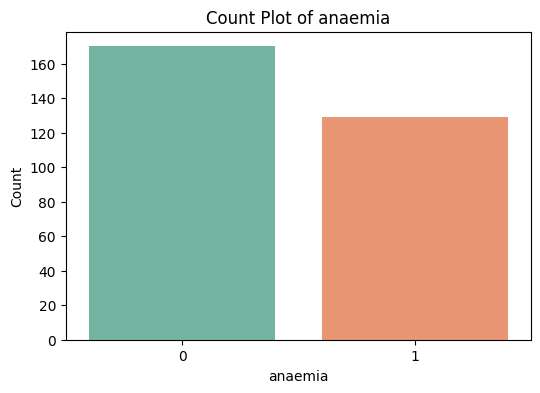

In [12]:
# Memplot count plot untuk 'anaemia'
plot_countplot('anaemia')

Pada visualisasi di atas, secara keseluruhan diketahui bahwa perbandingan antara seseorang baik yang mengalami pengurangan hemoglobin (anemia) atau tidak cenderung lebih banyak yang tidak meninggal dibandingkan dengan yang meninggal. Sedangkan untuk frekuensi seseorang yang meninggal lebih banyak yang tidak mengalami penurunan hemoglobin (anemia), begitupun untuk frekuensi seseorang yang tidak meninggal lebih banyak yang tidak mengalamai penurunan hemoglobin (anemia)

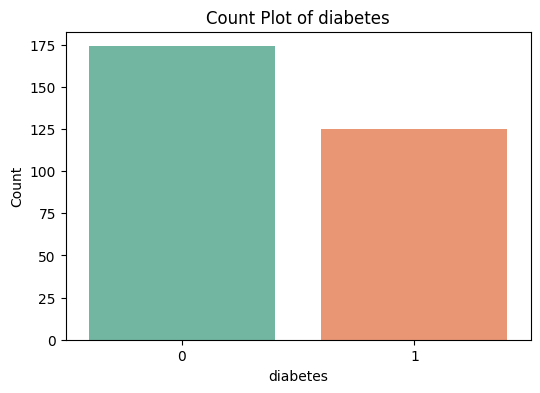

In [13]:
# Memplot count plot untuk 'diabetes'
plot_countplot('diabetes')

Pada visualisasi di atas, secara keseluruhan diketahui bahwa perbandingan antara seseorang baik yang mengidap diabetes atau tidak cenderung lebih banyak yang tidak meninggal dibandingkan dengan yang meninggal. Sedangkan untuk frekuensi seseorang yang meninggal lebih banyak yang tidak mengidap diabetes, begitupun untuk frekuensi seseorang yang tidak meninggal lebih banyak yang tidak mengidap diabetes.

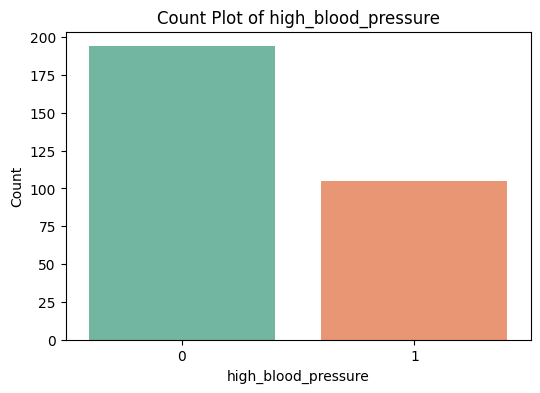

In [14]:
# Memplot count plot untuk 'high_blood_pressure'
plot_countplot('high_blood_pressure')

Pada visualisasi di atas, secara keseluruhan diketahui bahwa perbandingan antara seseorang baik yang mempunyai darah tinggi atau tidak cenderung lebih banyak yang tidak meninggal dibandingkan dengan yang meninggal. Sedangkan untuk frekuensi seseorang yang meninggal lebih banyak yang tidak mempunyai darah tinggi, begitupun untuk frekuensi seseorang yang tidak meninggal lebih banyak yang tidak mempunyai darah tinggi.

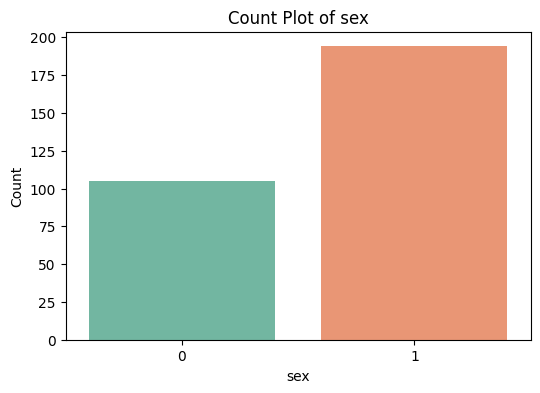

In [15]:
# Memplot count plot untuk "sex"
plot_countplot('sex')

Pada visualisasi di atas, frekuensi seseorang yang meninggal lebih banyak berjenis kelamin wanita dibandingkan pria, begitupun dengan frekuensi seseorang yang tidak meninggal lebih banyak yang berjenis kelamin wanita.

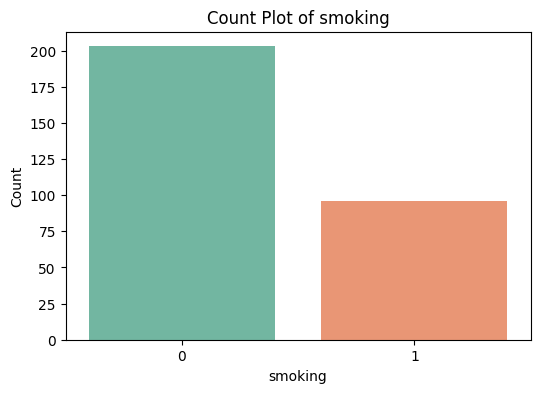

In [16]:
# Memplot count plot untuk 'diabetes'
plot_countplot('smoking')

Pada visualisasi di atas, secara keseluruhan diketahui bahwa perbandingan antara seseorang baik yang merokok atau tidak cenderung lebih banyak yang tidak meninggal dibandingkan dengan yang meninggal. Sedangkan untuk frekuensi seseorang yang meninggal lebih banyak yang tidak merokok, begitupun untuk frekuensi seseorang yang tidak meninggal lebih banyak yang tidak merokok.

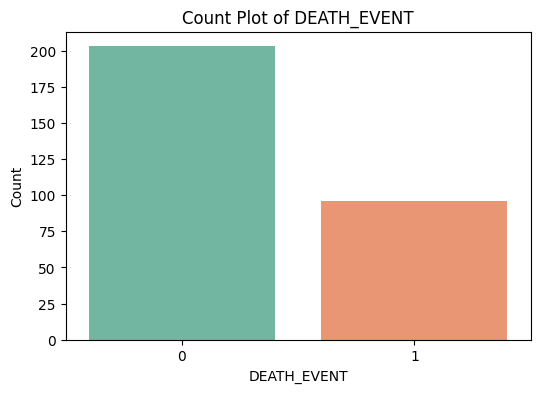

In [17]:
# Memplot count plot untuk 'DEATH_EVENT'
plot_countplot('DEATH_EVENT')

Pada visualisasi di atas, dapat terlihat bahwa kolom DEATH_EVENT menunjukan data yang imbalanced. Imbalnaced sendiri merupakan suatu keadaan dimana distribusi kelas data tidak seimbang, jumlah kelas data (instance) yang satu lebih sedikit atau lebih banyak dibanding dengan jumlah kelas data lainnya. Selanjutnya akan kami lakukan penanganan agar data menjadi seimbang.

#### 5.4 Pair Plot

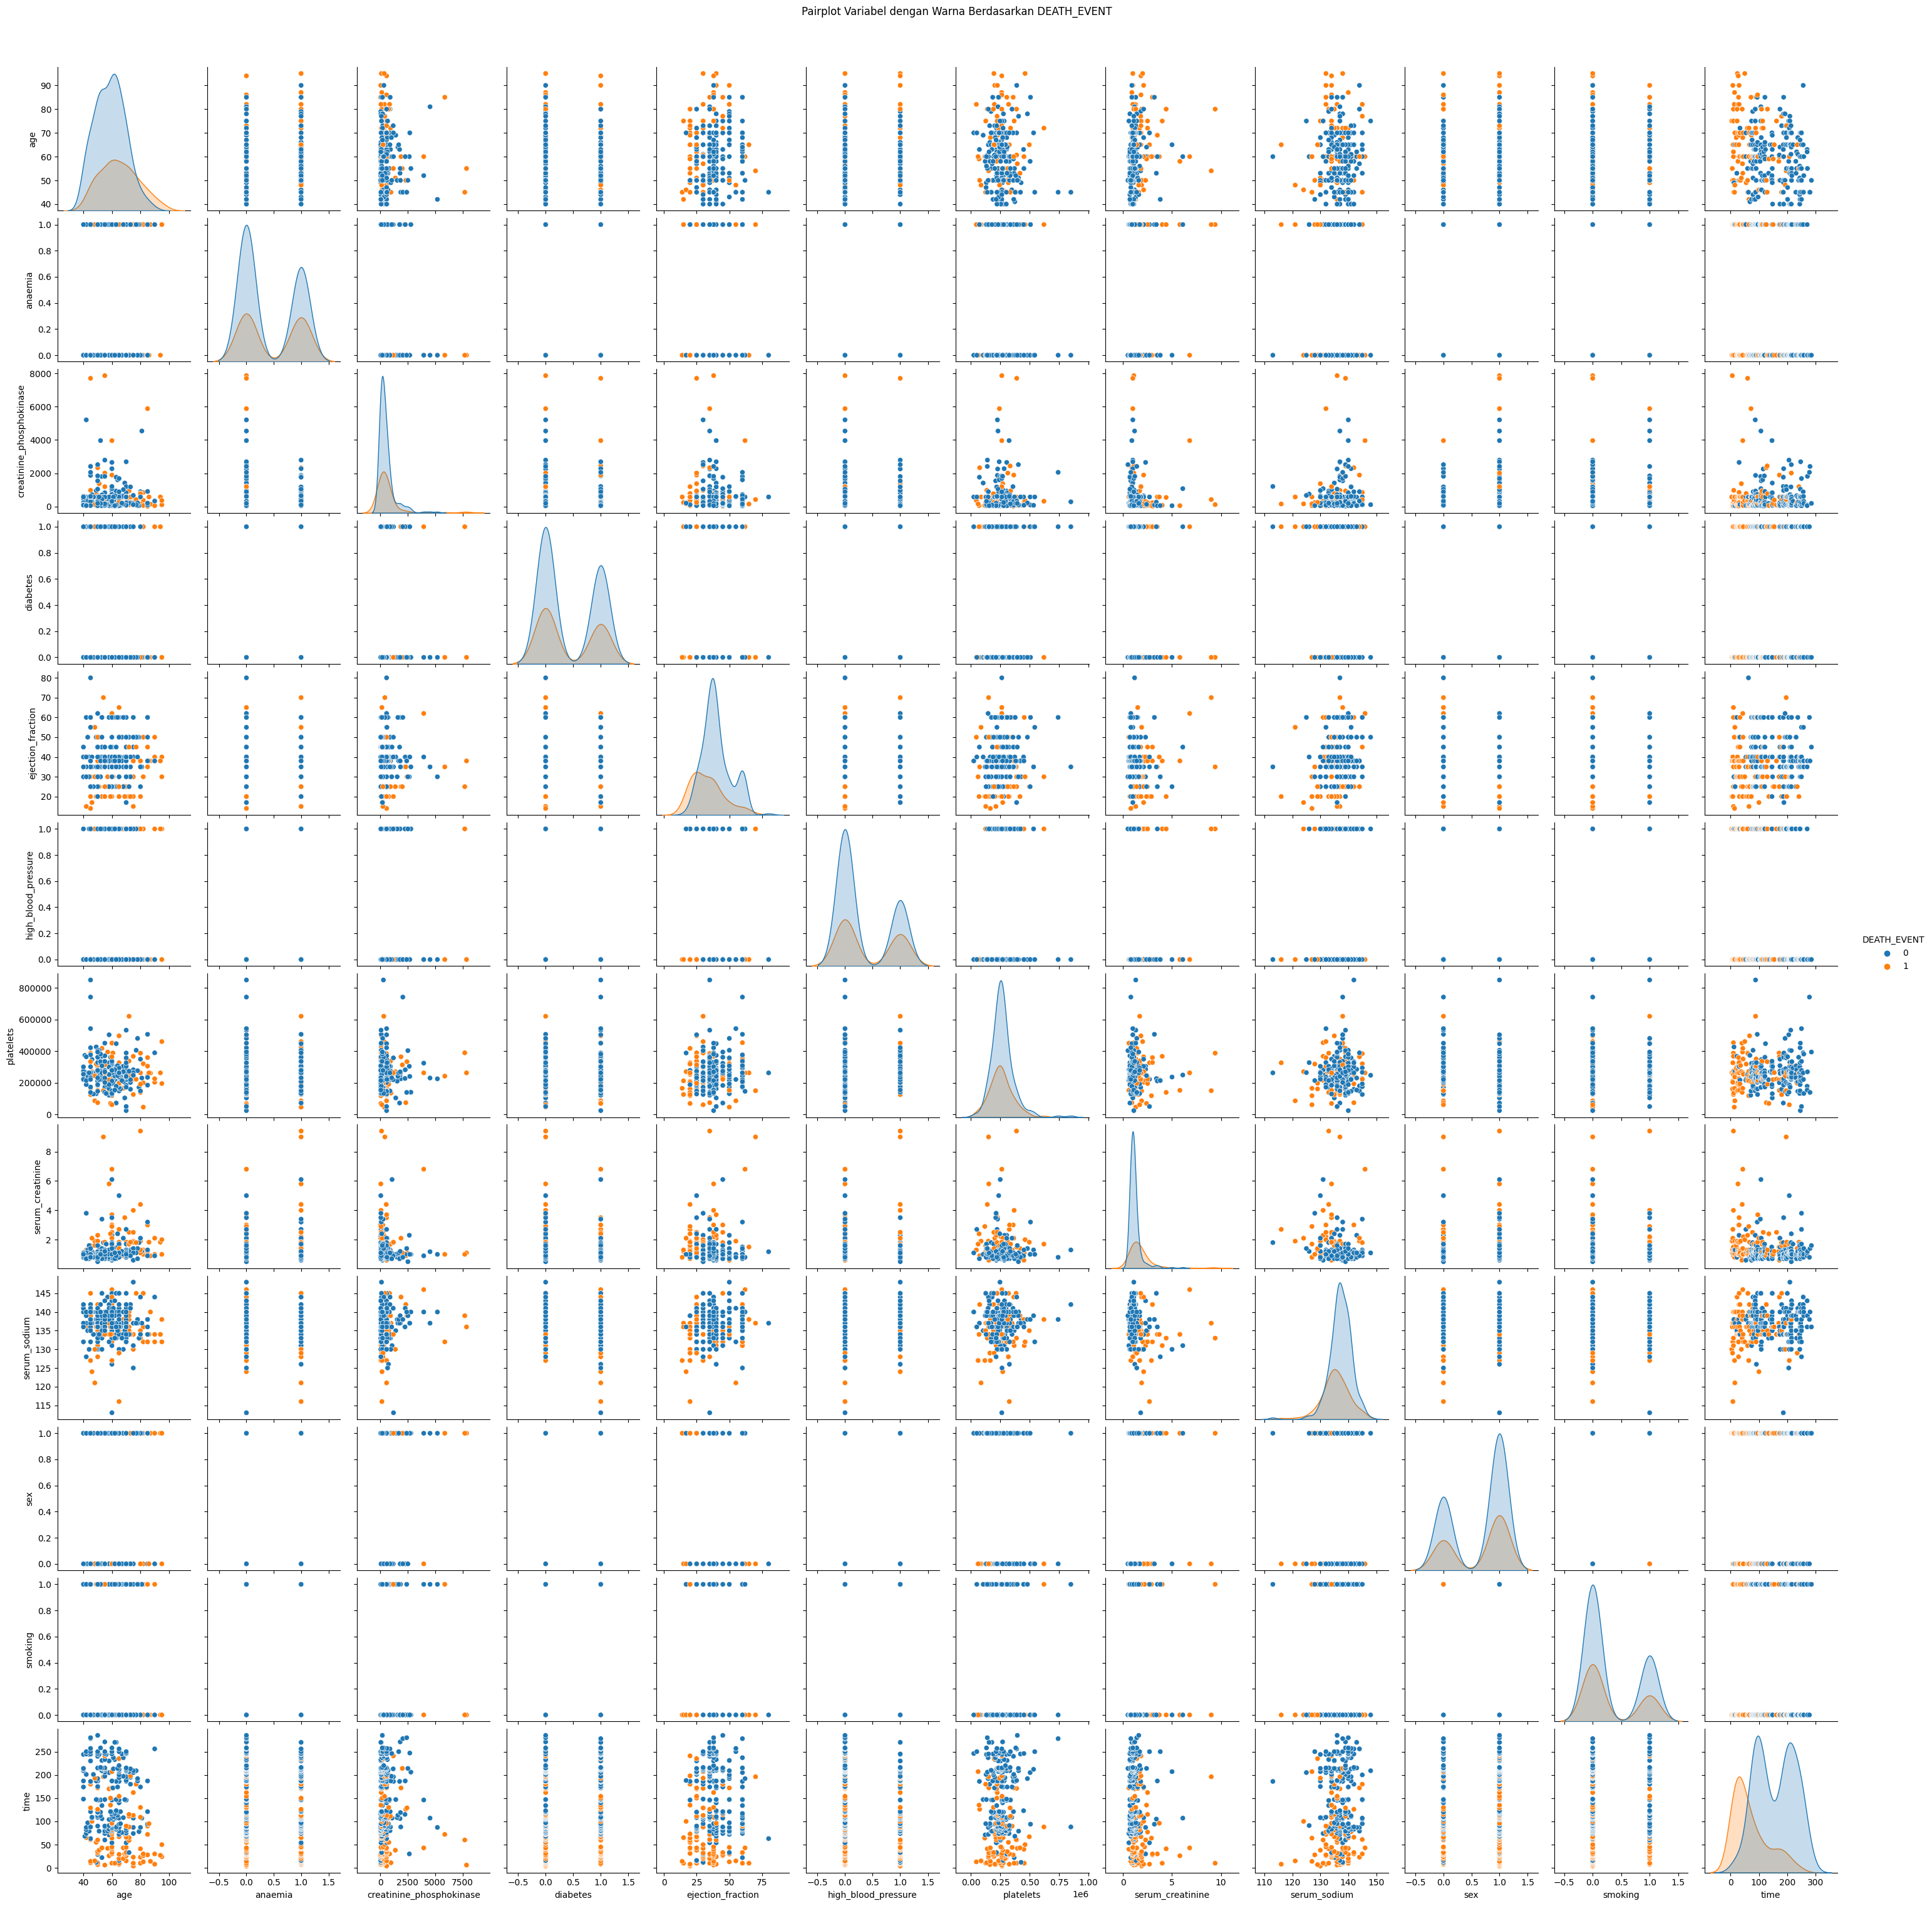

In [18]:
sns.pairplot(data_df, hue='DEATH_EVENT', diag_kind='kde')
plt.suptitle('Pairplot Variabel dengan Warna Berdasarkan DEATH_EVENT', y=1.02)
plt.show()



Pair plot diatas menggunakan seaborn (sns) untuk membuat matriks scatter plot dari beberapa atribut numerik dari dataset, dengan pemisah (hue) berdasarkan kolom 'DEATH_EVENT' atau status pasien (meninggal/hidup). Setiap baris matriks menampilkan scatter plot dari dua atribut numerik yang berbeda, sementara warna yang berbeda bertujuan untuk memudahkan kami dalam membedakan apakah terjadi kematian atau tidak. Dengan ini, dapat membantu kami melihat pola hubungan antar atribut secara keseluruhan, sekaligus membedakan bagaimana pola tersebut berkaitan dengan variabel target (DEATH_EVENT) dan membantu kami dalam melakukan penilaian awal tentang korelasi atau perbedaan antara variabel yang diamati dan target yang ingin diprediksi.

### 5.3 Survival Status

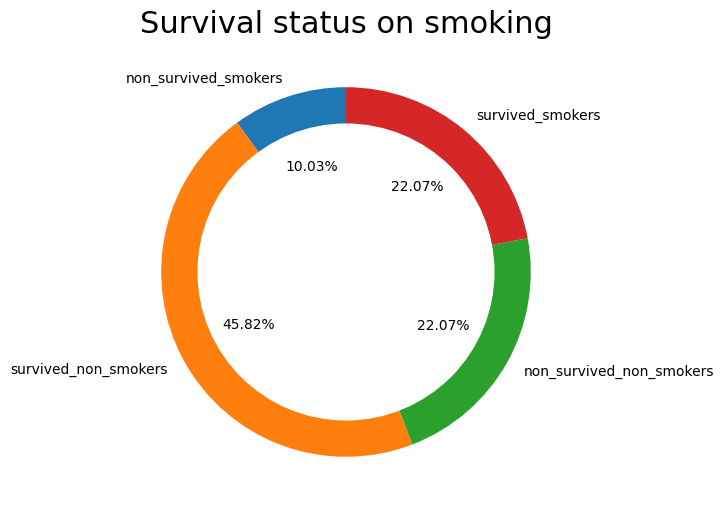

In [19]:
smokers = data_df[data_df["smoking"]==1]
non_smokers = data_df[data_df["smoking"]==0]

non_survived_smokers = smokers[smokers["DEATH_EVENT"]==1]
survived_non_smokers = non_smokers[non_smokers["DEATH_EVENT"]==0]
non_survived_non_smokers = non_smokers[non_smokers["DEATH_EVENT"]==1]
survived_smokers = smokers[smokers["DEATH_EVENT"]==0]

smoking_data = [len(non_survived_smokers), len(survived_non_smokers),len(non_survived_non_smokers),len(survived_smokers)]
smoking_labels = ["non_survived_smokers", "survived_non_smokers", "non_survived_non_smokers", "survived_smokers"]

plt.figure(figsize=(6,6))
plt.pie(smoking_data, labels = smoking_labels, autopct='%.2f%%', startangle=90)
circle = plt.Circle((0,0), 0.8, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status on smoking", fontsize=22)
plt.show()


Berdasarkan analisis status kelangsungan hidup berdasarkan kebiasaan merokok pada dataset yang disajikan selamat, dapat dilihat bahwa proporsi individu yang tidak dan merupakan perokok adalah sekitar 10,03%. Di sisi lain, proporsi individu yang selamat namun juga merokok adalah sekitar 22,07%. Untuk kelompok individu yang tidak merokok, sekitar 22,07% di antaranya tidak selamat, sedangkan proporsi yang selamat mencapai 45,82%.

Dengan melihat hasil ini, dapat diambil beberapa pengamatan awal. Proporsi yang tinggi pada kelompok individu yang selamat dan tidak merokok menunjukkan mungkin ada faktor-faktor lain yang berkontribusi pada tingkat kelangsungan hidup di antara mereka. Sebaliknya, kelompok perokok, terutama kelompok tidak sehat, memiliki proporsi yang lebih rendah, menandakan bahwa merokok mungkin berperan dalam penurunan tingkat kelangsungan hidup.

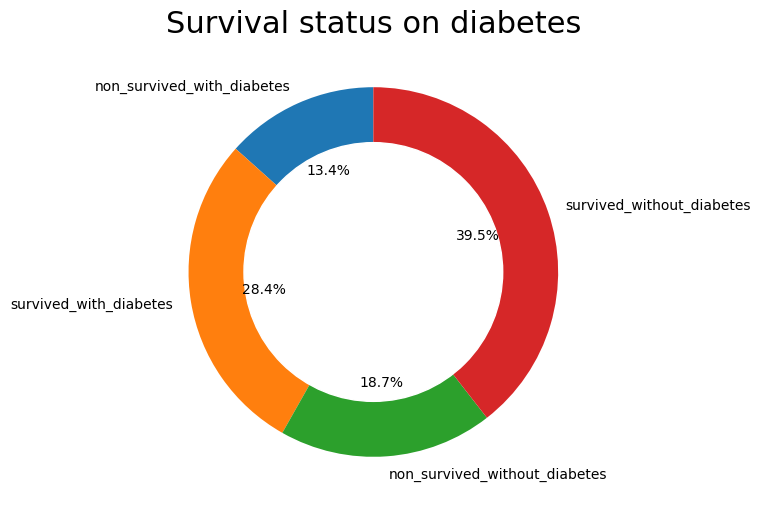

In [20]:
with_diabetes = data_df[data_df["diabetes"]==1]
without_diabetes = data_df[data_df["diabetes"]==0]

non_survived_with_diabetes = with_diabetes[with_diabetes["DEATH_EVENT"]==1]
survived_with_diabetes = with_diabetes[with_diabetes["DEATH_EVENT"]==0]
non_survived_without_diabetes = without_diabetes[without_diabetes["DEATH_EVENT"]==1]
survived_without_diabetes = without_diabetes[without_diabetes["DEATH_EVENT"]==0]

diabetes_data = [len(non_survived_with_diabetes), len(survived_with_diabetes), len(non_survived_without_diabetes), \
                 len(survived_without_diabetes)]
diabetes_labels = ["non_survived_with_diabetes","survived_with_diabetes","non_survived_without_diabetes",\
                   "survived_without_diabetes"]

plt.figure(figsize=(6,6))
plt.pie(diabetes_data, labels = diabetes_labels, autopct='%.1f%%', startangle=90)
circle = plt.Circle((0,0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status on diabetes", fontsize=22)
plt.show()

dari data ini individu yang memiliki riwayat diabetes dan tidak selamat (non survivor-diabet) mencapai sekitar 13,4% dari total populasi, sementara individu yang memiliki diabetes namun berhasil selamat (survived-diabet) memiliki proporsi yang lebih tinggi, mencapai 39,5%. Di sisi lain, individu yang tidak memiliki riwayat diabetes dan tidak selamat (non survivor-non diabet) menyumbang sekitar 18,7%, sementara individu yang tidak memiliki riwayat diabetes dan berhasil selamat (survived-non diabetes) mencapai 28,4%. Analisis ini memberikan gambaran visual yang jelas tentang hubungan antara status diabetes dan tingkat kelangsungan hidup, menunjukkan bahwa individu dengan diabetes memiliki peluang kelangsungan hidup yang lebih tinggi dibandingkan dengan individu tanpa riwayat diabetes. yang menanadakan diabetes bukan pemeran utama dalam penyebab gagal jantung.

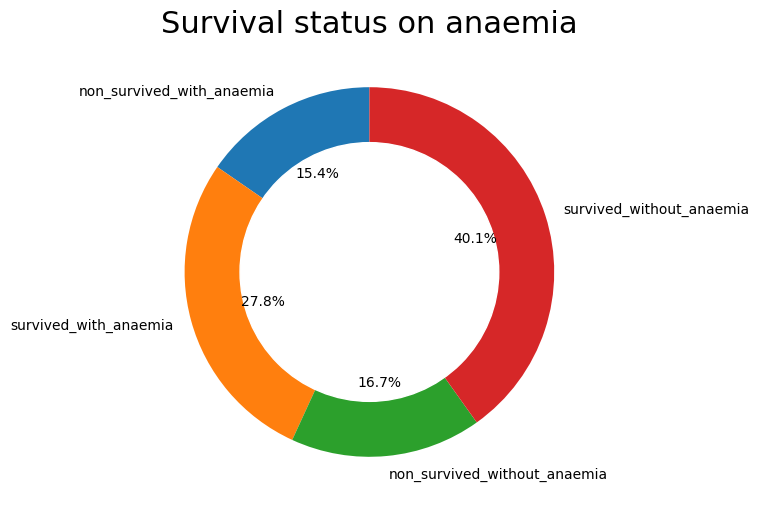

In [21]:
with_anaemia = data_df[data_df["anaemia"]==1]
without_anaemia = data_df[data_df["anaemia"]==0]

non_survived_with_anaemia = with_anaemia[with_anaemia["DEATH_EVENT"]==1]
survived_with_anaemia = with_anaemia[with_anaemia["DEATH_EVENT"]==0]
non_survived_without_anaemia = without_anaemia[without_anaemia["DEATH_EVENT"]==1]
survived_without_anaemia = without_anaemia[without_anaemia["DEATH_EVENT"]==0]

anaemia_data = [len(non_survived_with_anaemia), len(survived_with_anaemia), len(non_survived_without_anaemia), \
                len(survived_without_anaemia)]
anaemia_labels = ["non_survived_with_anaemia","survived_with_anaemia","non_survived_without_anaemia",\
                  "survived_without_anaemia"]

plt.figure(figsize=(6,6))
plt.pie(anaemia_data, labels = anaemia_labels, autopct='%.1f%%', startangle=90)
circle = plt.Circle((0,0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status on anaemia", fontsize=22)
plt.show()

 Dari populasi yang mengalami anemia, sebanyak 15,4% mengalami ketidakberlanjutan hidup (non-survived), sementara 27,8% berhasil selamat. Di sisi lain, pada mereka yang tidak mengalami anemia, terdapat perbedaan yang signifikan, dimana 16,7% mengalami ketidakberlanjutan hidup dan sebagian besar, yakni 40,1%, berhasil bertahan. Hasil ini memberikan gambaran bahwa individu yang tidak mengalami anemia cenderung memiliki tingkat kelangsungan hidup yang lebih tinggi dibandingkan dengan mereka yang mengalami kondisi anemia. Oleh karena itu, dapat disimpulkan bahwa kondisi anemia mungkin menjadi faktor kritis yang mempengaruhi hasil survival pada dataset ini.

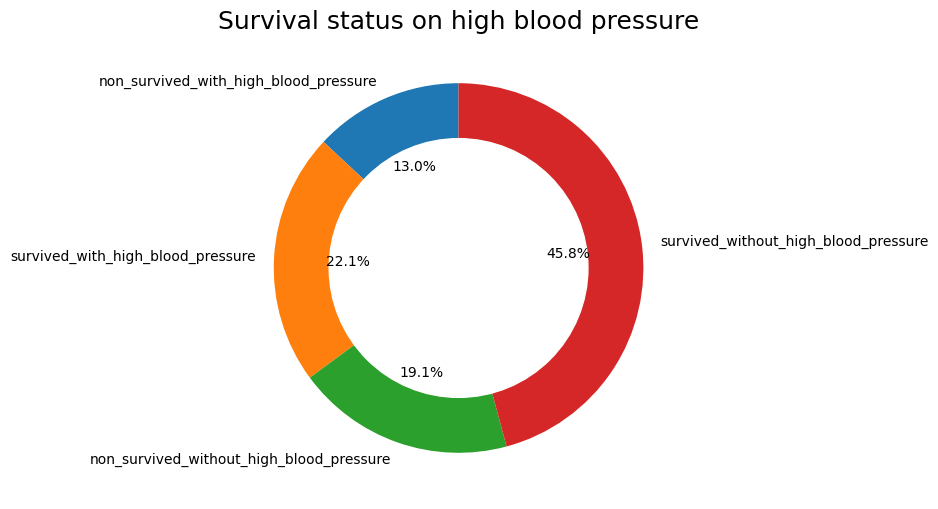

In [22]:
with_high_blood_pressure = data_df[data_df["high_blood_pressure"]==1]
without_high_blood_pressure = data_df[data_df["high_blood_pressure"]==0]

non_survived_with_high_blood_pressure = with_high_blood_pressure[with_high_blood_pressure["DEATH_EVENT"]==1]
survived_with_high_blood_pressure = with_high_blood_pressure[with_high_blood_pressure["DEATH_EVENT"]==0]
non_survived_without_high_blood_pressure = without_high_blood_pressure[without_high_blood_pressure["DEATH_EVENT"]==1]
survived_without_high_blood_pressure = without_high_blood_pressure[without_high_blood_pressure["DEATH_EVENT"]==0]

high_blood_pressure_data = [len(non_survived_with_high_blood_pressure), len(survived_with_high_blood_pressure), \
                            len(non_survived_without_high_blood_pressure), len(survived_without_high_blood_pressure)]

high_blood_pressure_labels = ["non_survived_with_high_blood_pressure","survived_with_high_blood_pressure",\
                   "non_survived_without_high_blood_pressure","survived_without_high_blood_pressure"]

plt.figure(figsize=(6,6))
plt.pie(high_blood_pressure_data, labels = high_blood_pressure_labels, autopct='%.1f%%', startangle=90)
circle = plt.Circle((0,0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status on high blood pressure", fontsize=18)
plt.show()

Dari data tersebut, dapat disimpulkan bahwa 13% dari individu yang memiliki tekanan darah tinggi tidak selamat, sementara 22,1% berhasil bertahan. Di sisi lain, pada kelompok yang tidak memiliki tekanan darah tinggi, terlihat bahwa tingkat kelangsungan hidup lebih tinggi, yakni sebesar 45,8%, sementara 19,1% mengalami kegagalan bertahan.

Analisis ini memberikan gambaran awal bahwa tekanan darah tinggi dapat memainkan peran kunci dalam mempengaruhi prognosis pasien, dengan individu yang tidak memiliki tekanan darah tinggi cenderung memiliki tingkat kelangsungan hidup yang lebih tinggi.

## F. Data Preprocessing

In [23]:
data_df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


<Axes: title={'center': 'Correlation Heatmap of Heart Failure Prediction'}>

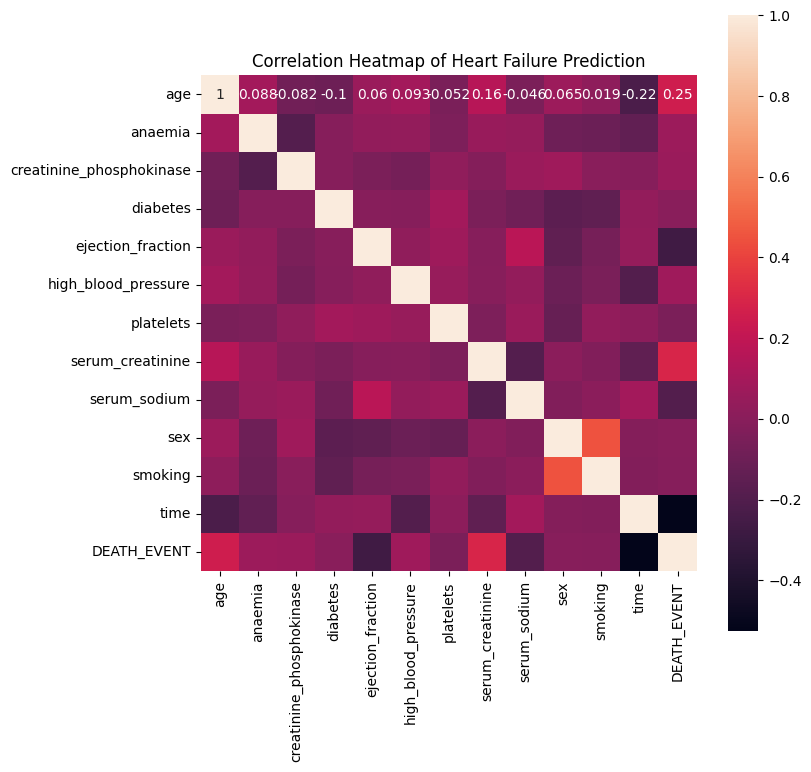

In [24]:
fig, ax = plt.subplots()
plt.title('Correlation Heatmap of Heart Failure Prediction')
fig.set_size_inches((8,8))
sns.heatmap(data_df.corr(), square = True, annot = True)

Heatmap diatas menggambarkan bagaimana matriks berkorelasi untuk mengukur hubungan antar atribut numerik dalam df_corr.
Warna yang digunakan menggambarkan tingkat korelasi, dan setiap sel diisi dengan nilai korelasi yang sesuai.
Menggunakan warna merah untuk korelasi positif dan biru untuk korelasi negatif. Semakin kuat korelasi, semakin intens warnanya.
Dengan begitu, dapat membantu kami memahami sejauh mana atribut saling berkaitan, membantu dalam pemilihan atribut dan perumusan hipotesis dalam analisis data.

Setiap sel pada heatmap berisi nilai korelasi antara dua variabel. Nilai korelasi berkisar antara -1 hingga 1, di mana:
- Nilai positif mendekati 1 menunjukkan korelasi positif yang kuat, yang berarti dua variabel cenderung bergerak ke arah yang sama.
- Nilai negatif mendekati -1 menunjukkan korelasi negatif yang kuat, yang berarti dua variabel cenderung bergerak ke arah yang berlawanan.
- Nilai mendekati 0 menunjukkan korelasi yang lemah atau tidak ada korelasi antara dua variabel.

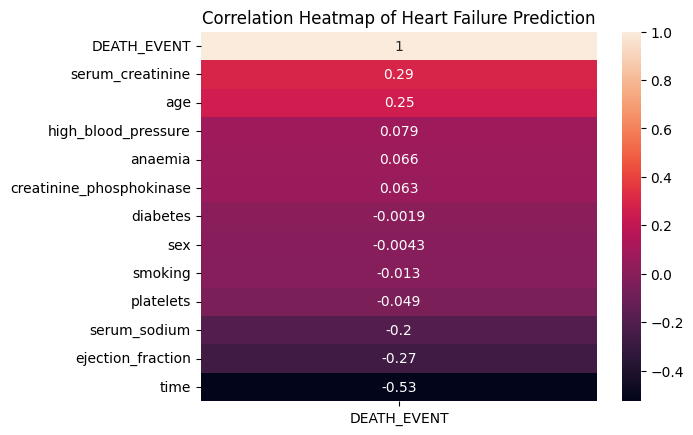

In [25]:
sns.heatmap(data_df.corr()[['DEATH_EVENT']].sort_values(by='DEATH_EVENT', ascending=False), annot = True)
plt.title('Correlation Heatmap of Heart Failure Prediction')
plt.show()

Dapat terlihat pada tabel di atas, bahwa nilai korelasi masing-masing variabel terhadap variabel DEATH_EVENT menunjukan angka yang cukup kecil. Variabel yang memiliki korelasi cukup tinggi terhadap variabel DEATH_EVENT adalah serum_creatinine dan variabel yang memiliki korelasi sangat rendah terhadap variabel DEATH_EVENT adalah variabel time.

## 6.1 Pembersihan Dataset dari Outlier
### 6.1 Tanpa Cleaning Outlier : data original

In [26]:
data_df = data_df.copy()

In [27]:
data_df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


Dalam melakukan percobaan untuk sebuah parameter, kami memutuskan untuk mengabaikan outlier dengan pertimbangan, yaitu dikarenakan dataset hanya memiliki beberapa atribut saja yang dalam kategorinya dataset ini berskala kecil, sehingga apabila kami mencoba memperbaikinya maka menjadi tidak terlihat perbedaan antara parameternya. Lalu, kami menggunakan atribut-atribut untuk analisis dan pemodelan, sehingga membiarkan outlier akan menampilkan hasil analisis yang murni dan membantu kami menguji metode mana yang tepat.

### 6.2 Cleaning Outlier IQR : data_df_iqr

In [28]:
data_df_iqr = data_df.copy()

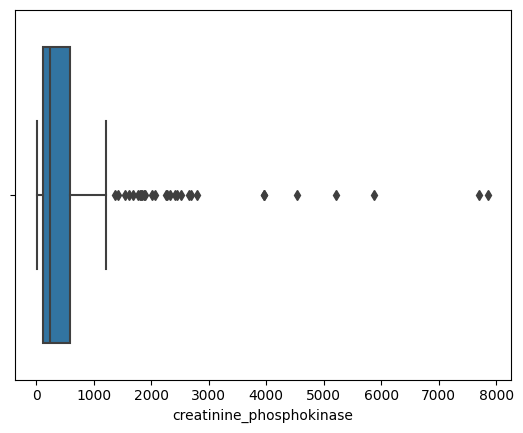

In [29]:
# Sebelum
sns.boxplot(x=data_df_iqr['creatinine_phosphokinase'])
plt.show()

In [30]:
def remove_outliers_iqr(column, k=1.5):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR

    # Menghapus outlier
    cleaned_data = column[(column >= lower_bound) & (column <= upper_bound)]

    return cleaned_data

for column in data_df_iqr.columns:
    data_df_iqr[column] = remove_outliers_iqr(data_df_iqr[column])

# Drop NaN values
data_df_iqr.dropna(inplace=True)

# Reset the index
data_df_iqr.reset_index(drop=True, inplace=True)

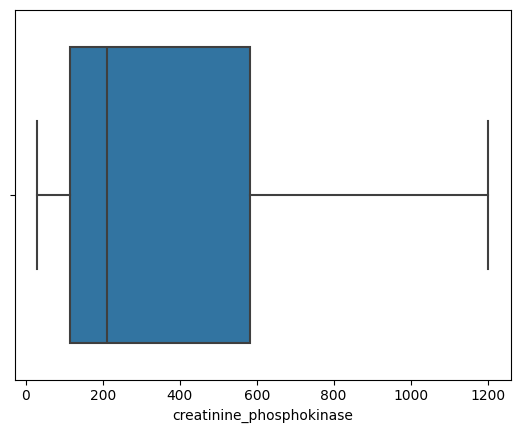

In [31]:
# Setelah
sns.boxplot(x=data_df_iqr['creatinine_phosphokinase'])
plt.show()

Dengan metode IQR telah memberikan hasil yang cukup efektif dalam membersihkan outlier secara menyeluruh. Penggunaan IQR mampu menghapus nilai-nilai ekstrem pada dataset dengan lebih baik. Dengan ini, dapat diartikan bahwa menggunakan IQR merupakan strategi yang lebih handal dalam mengatasi outlier dan memastikan bahwa data yang digunakan dalam analisis nantinya jauh lebih konsisten. Lalu, menurut kami IQR menjadi pilihan yang tepat untuk menghasilkan dataset yang lebih terpercaya untuk analisis nanti.

In [32]:
data_df_iqr.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
219,60.0,0,320.0,0,35.0,0,133000.0,1.4,139.0,1,0,258,0
220,52.0,0,190.0,1,38.0,0,382000.0,1.0,140.0,1,1,258,0
221,63.0,1,103.0,1,35.0,0,179000.0,0.9,136.0,1,1,270,0
222,62.0,0,61.0,1,38.0,1,155000.0,1.1,143.0,1,1,270,0
223,50.0,0,196.0,0,45.0,0,395000.0,1.6,136.0,1,1,285,0


### 6.3 SMOTE()

#### 6.3.1 data original

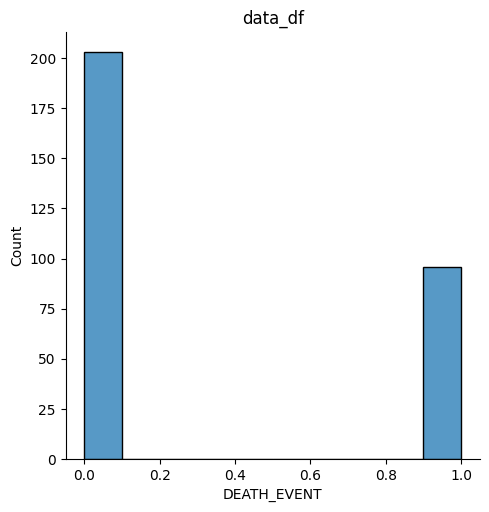

In [33]:
# Sebelum
sns.displot(data_df['DEATH_EVENT'])
plt.title('data_df')
plt.show()

In [34]:
x_ori = data_df.drop('DEATH_EVENT', axis=1)
y_ori = data_df['DEATH_EVENT']

smote = SMOTE(random_state=3)
x_resampled_ori, y_resampled_ori = smote.fit_resample(x_ori, y_ori)
print('Jumlah kelas sebelum SMOTE:', y_ori.value_counts())
print('\n\nJumlah kelas setelah SMOTE:', y_resampled_ori.value_counts())

Jumlah kelas sebelum SMOTE: DEATH_EVENT
0    203
1     96
Name: count, dtype: int64


Jumlah kelas setelah SMOTE: DEATH_EVENT
1    203
0    203
Name: count, dtype: int64


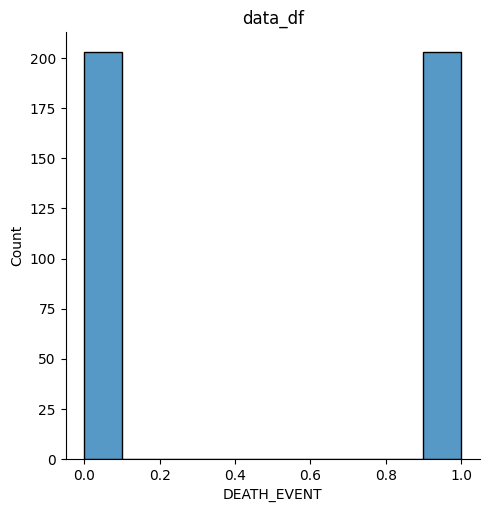

In [35]:
# Sesudah
sns.displot(y_resampled_ori)
plt.title('data_df')
plt.show()

#### 6.3.2 data_df_iqr

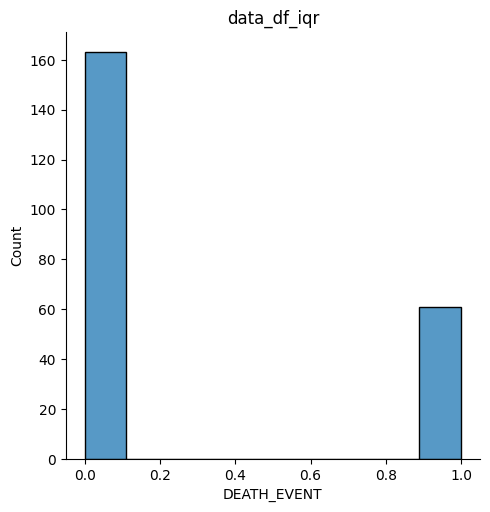

In [36]:
# Sebelum
sns.displot(data_df_iqr['DEATH_EVENT'])
plt.title('data_df_iqr')
plt.show()

In [37]:
x_iqr = data_df_iqr.drop('DEATH_EVENT', axis=1)
y_iqr = data_df_iqr['DEATH_EVENT']

smote = SMOTE(random_state=3)
x_resampled_iqr, y_resampled_iqr = smote.fit_resample(x_iqr, y_iqr)
print('Jumlah kelas sebelum SMOTE:', y_iqr.value_counts())
print('\n\nJumlah kelas setelah SMOTE:', y_resampled_iqr.value_counts())


Jumlah kelas sebelum SMOTE: DEATH_EVENT
0    163
1     61
Name: count, dtype: int64


Jumlah kelas setelah SMOTE: DEATH_EVENT
1    163
0    163
Name: count, dtype: int64


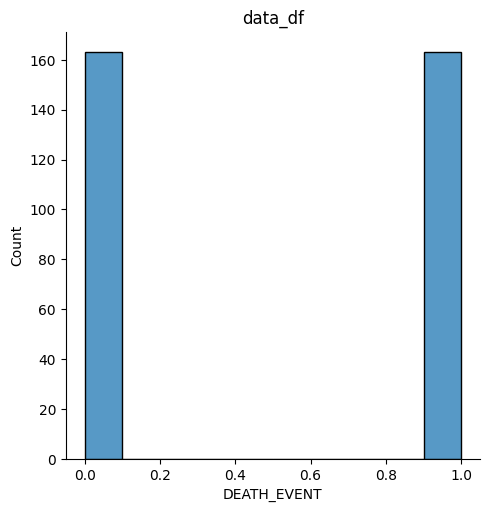

In [38]:
# Sesudah
sns.displot(y_resampled_iqr)
plt.title('data_df')
plt.show()

Displot diatas menggambarkan distribusi dari variabel target 'y_train_' yang dapat membantu kami untuk melihat adanya keseimbangan atau ketidakseimbangan distribusi data dalam dataset sebelum penerapan teknik SMOTE. Jika terdapat data yang tidak seimbang, maka kemudian kami melakukan teknik SMOTE agar dapat menangani masalah ketidakseimbangan tersebut dengan menciptakan sampel sintetis pada atribut minoritas untuk mencapai keseimbangan yang lebih baik sehingga model yang didapat baik.

### 6.4 train_test_split()

#### 6.4.1 data original

In [39]:
# Memisahkan fitur dan target
x_ori = x_resampled_ori
y_ori = y_resampled_ori

# Memisahkan data menjadi data latih 80%  dan data uji 20%
x_train_ori, x_test_ori, y_train_ori, y_test_ori = train_test_split(x_ori,
                                                                    y_ori,
                                                                    test_size=0.2,
                                                                    random_state=3)


#### 6.4.2 data_df_iqr

In [40]:

# Memisahkan fitur dan target
x_iqr = x_resampled_iqr
y_iqr = y_resampled_iqr

# Memisahkan data menjadi data latih 80%  dan data uji 20%
x_train_iqr, x_test_iqr, y_train_iqr, y_test_iqr = train_test_split(x_iqr,
                                                                    y_iqr,
                                                                    test_size=0.2,
                                                                    random_state=3)


### 6.5 StandardScaler()

#### 6.5.1 data original

In [41]:
# Standarisasi atribut prediktor (x_ori)

scaler = StandardScaler()
x_train_ori = scaler.fit_transform(x_train_ori)
x_test_ori = scaler.transform(x_test_ori)
print('x train (baris,kolom) : ', x_train_ori.shape)
print('x test  (baris,kolom) : ', x_test_ori.shape)
print('\ny train (baris,kolom) : ', y_train_ori.shape)
print('y test  (baris,kolom) : ', y_test_ori.shape)

x train (baris,kolom) :  (324, 12)
x test  (baris,kolom) :  (82, 12)

y train (baris,kolom) :  (324,)
y test  (baris,kolom) :  (82,)


In [42]:
accuracy_list= []

#### 6.5.2 data_df_iqr

In [43]:
# Standarisasi atribut prediktor (x_iqr)

scaler = StandardScaler()
x_train_iqr = scaler.fit_transform(x_train_iqr)
x_test_iqr = scaler.transform(x_test_iqr)
print('x train (baris,kolom) : ', x_train_iqr.shape)
print('x test  (baris,kolom) : ', x_test_iqr.shape)
print('\ny train (baris,kolom) : ', y_train_iqr.shape)
print('y test  (baris,kolom) : ', y_test_iqr.shape)
# G. Model Definition & Training Model
## G.1 Random Forest dengan GridSearchCV
parameter_RF = {'n_estimators': [50, 100, 150],
                'max_depth': [None, 10, 20],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 3],
                'max_features': ['sqrt', 'log2', None],
                'criterion': ['gini', 'entropy']}

x train (baris,kolom) :  (260, 12)
x test  (baris,kolom) :  (66, 12)

y train (baris,kolom) :  (260,)
y test  (baris,kolom) :  (66,)


## G. Pendefinisian dan Pegenalan Model

#### 7.1 Logistic Regretion

              precision    recall  f1-score   support

           0       0.90      0.80      0.85        45
           1       0.79      0.89      0.84        37

    accuracy                           0.84        82
   macro avg       0.84      0.85      0.84        82
weighted avg       0.85      0.84      0.84        82



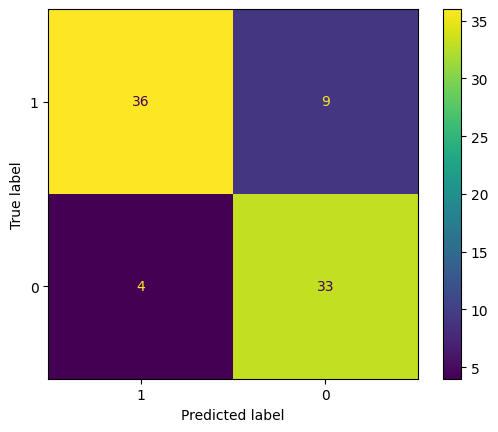

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

log_reg = LogisticRegression(random_state=1)
log_reg.fit(x_train_ori, y_train_ori)
y_pred = log_reg.predict(x_test_ori)

#evaluation

log_reg_acc = accuracy_score(y_test_ori, y_pred)
accuracy_list.append(100*log_reg_acc)
print(classification_report(y_test_ori, y_pred))

# confusion matrix

cm = confusion_matrix(y_test_ori, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['1','0'])
cmd.plot()
plt.show()




Berdasarkan evaluasi model Logistic regretion, terdapat prediksi terkait dengan Heart Failure. Untuk kelas 1 (mengindikasikan Heart Failure), model memiliki:

    - False Negatives (FN) sebanyak 4, yang berarti ada 4 kasus Heart Failure yang tidak terdeteksi oleh model.
    - True Positives (TP) sebanyak 36, yang berarti ada 36 kasus Heart Failure yang berhasil terdeteksi oleh model.

- Precision (Presisi): Dari semua prediksi positif yang dilakukan oleh model, sekitar 79% benar-benar mewakili kasus-kasus kegagalan jantung. Namun, sekitar 21% dari prediksi positif tersebut merupakan hasil positif palsu, yang dapat berarti ada risiko mendeteksi kondisi yang sebenarnya tidak terjadi.

- Recall (Sensitivitas): Model dapat mengidentifikasi sekitar 89% dari semua kasus kegagalan jantung yang sebenarnya. Ini menunjukkan kemampuan model untuk mendeteksi keberadaan penyakit jantung pada sebagian besar kasus yang sebenarnya positif.

- F1-Score: Rata-rata harmonik antara precision dan recall adalah sekitar 84%. Ini menggambarkan keseimbangan antara kemampuan model untuk memberikan prediksi positif yang benar dan mendeteksi sebagian besar kasus yang sebenarnya positif.

- Accuracy (Akurasi): Model dapat melakukan klasifikasi dengan benar pada sekitar 84% dari semua kasus. Meskipun akurasi memberikan gambaran keseluruhan, perlu diingat bahwa dalam beberapa kasus (seperti penyakit jantung), mungkin lebih penting untuk fokus pada recall atau precision tergantung pada tujuan spesifik.



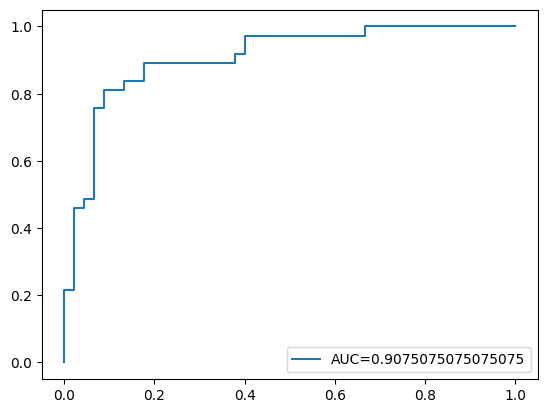

In [45]:
# ROC curve
y_pred_proba = log_reg.predict_proba(x_test_ori)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_ori,  y_pred_proba)
auc = metrics.roc_auc_score(y_test_ori, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()


Nilai AUC sekitar 0,9075 menunjukkan bahwa model memiliki kinerja yang baik dalam membedakan antara kelas positif dan negatif.
Semakin tinggi nilai AUC, semakin baik kemampuan model dalam membedakan antara instance positif dan negatif.
Dalam konteks ROC Curve, nilai AUC 0,9075 dapat dianggap sebagai kinerja yang sangat baik.

#### 7.2 K-Nearest Neighbors

Accuracy: 0.8536585365853658

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        45
           1       0.79      0.92      0.85        37

    accuracy                           0.85        82
   macro avg       0.86      0.86      0.85        82
weighted avg       0.86      0.85      0.85        82



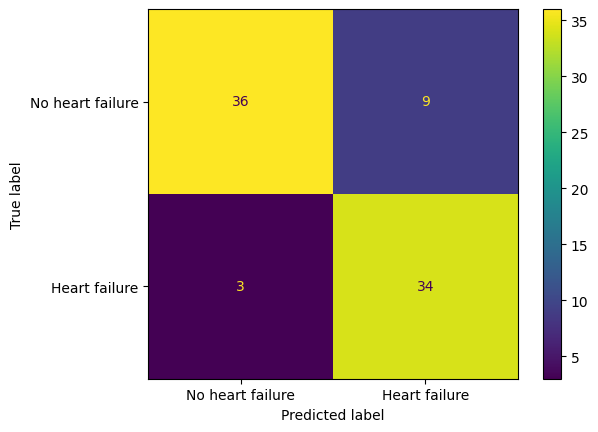

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn import metrics

# Skala data menggunakan StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_ori)
x_test_scaled = scaler.transform(x_test_ori)

# Inisialisasi model KNN
kn_clf = KNeighborsClassifier(n_neighbors=5)
kn_clf.fit(x_train_scaled, y_train_ori)
kn_pred = kn_clf.predict(x_test_scaled)

# Evaluasi model
kn_acc = accuracy_score(y_test_ori, kn_pred)
print(f'Accuracy: {kn_acc}')
print('\nClassification Report:')
print(classification_report(y_test_ori, kn_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_ori, kn_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No heart failure', 'Heart failure'])
cmd.plot()
plt.show()




Berdasarkan evaluasi model K-Nearest Neighbors , terdapat prediksi terkait dengan Heart Failure. Untuk kelas 1 (mengindikasikan Heart Failure), model memiliki:

        - False Negatives (FN) sebanyak 3, yang berarti ada 3 kasus Heart Failure yang tidak terdeteksi oleh model.
        - True Positives (TP) sebanyak 36, yang berarti ada 36 kasus Heart Failure yang berhasil terdeteksi oleh model.
        
- Precision (Presisi): Dari semua prediksi positif yang dilakukan oleh model, sekitar 80% benar-benar mewakili kasus-kasus Heart Failure. Namun, sekitar 20% dari prediksi positif tersebut merupakan hasil positif palsu, yang dapat berarti ada risiko mendeteksi kondisi yang sebenarnya tidak terjadi.

- Recall (Sensitivitas): Model dapat mengidentifikasi sekitar 92% dari semua kasus Heart Failure yang sebenarnya. Ini menunjukkan kemampuan model untuk mendeteksi keberadaan penyakit pada sebagian besar kasus yang sebenarnya positif.

- F1-Score: Rata-rata harmonik antara precision dan recall adalah sekitar 85%. Ini menggambarkan keseimbangan antara kemampuan model untuk memberikan prediksi positif yang benar dan mendeteksi sebagian besar kasus yang sebenarnya positif.

- Accuracy (Akurasi): Model dapat melakukan klasifikasi dengan benar pada sekitar 85% dari semua kasus. Meskipun akurasi memberikan gambaran keseluruhan, perlu diingat bahwa dalam beberapa kasus (seperti penyakit jantung), mungkin lebih penting untuk fokus pada recall atau precision tergantung pada tujuan spesifik.



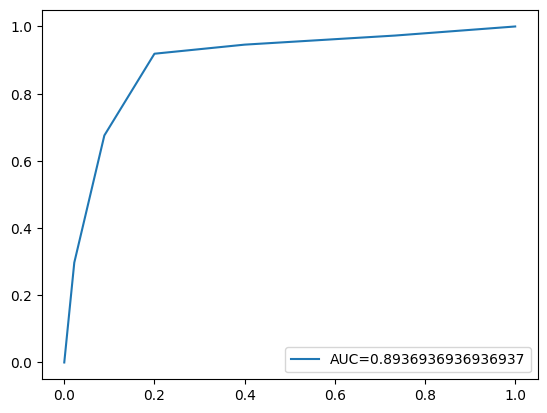

In [47]:
# ROC Curve
y_pred_proba = kn_clf.predict_proba(x_test_scaled)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test_ori, y_pred_proba)
auc = metrics.roc_auc_score(y_test_ori, y_pred_proba)
plt.plot(fpr, tpr, label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()



Nilai AUC sekitar 0,8936 menunjukkan bahwa model memiliki kinerja yang baik dalam membedakan antara kelas positif dan negatif.
Semakin tinggi nilai AUC, semakin baik kemampuan model dalam membedakan antara instance positif dan negatif.
Dalam konteks ROC Curve, nilai AUC 0,8936 dapat dianggap sebagai kinerja yang cukup baik.

#### 7.3 Support Vector Machine 

Accuracy: 82.93
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84        45
           1       0.78      0.86      0.82        37

    accuracy                           0.83        82
   macro avg       0.83      0.83      0.83        82
weighted avg       0.83      0.83      0.83        82



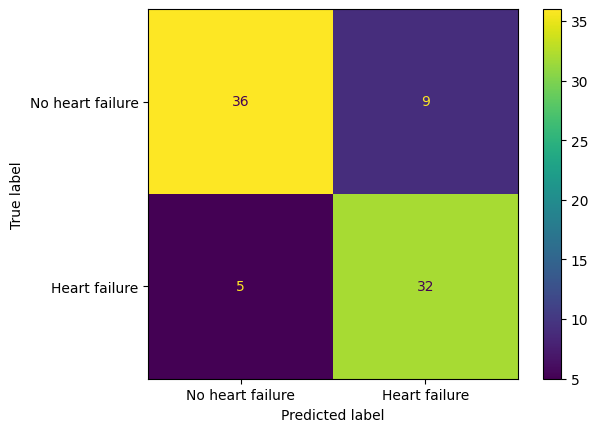

In [48]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
import matplotlib.pyplot as plt

# Skala data menggunakan StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_ori)
x_test_scaled = scaler.transform(x_test_ori)

# Inisialisasi model Support Vector Classifier (SVC)
sv_clf = SVC(C=0.7, kernel='linear', random_state=1, probability=True)
sv_clf.fit(x_train_scaled, y_train_ori)

# Melakukan prediksi pada data uji yang telah discaling
sv_clf_pred = sv_clf.predict(x_test_scaled)

# Evaluasi model
sv_clf_acc = accuracy_score(y_test_ori, sv_clf_pred)
print(f'Accuracy: {100 * sv_clf_acc:.2f}')

# Classification Report
print('Classification Report:')
print(classification_report(y_test_ori, sv_clf_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_ori, sv_clf_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No heart failure', 'Heart failure'])
cmd.plot()
plt.show()


Berdasarkan evaluasi model Support Vector Machine , terdapat prediksi terkait dengan Heart Failure. Untuk kelas 1 (mengindikasikan Heart Failure), model memiliki:

    - False Negatives (FN) sebanyak 5, yang berarti ada 5 kasus Heart Failure yang tidak terdeteksi oleh model.
    - True Positives (TP) sebanyak 36, yang berarti ada 36 kasus Heart Failure yang berhasil terdeteksi oleh model.

- Precision (Presisi): Dari semua prediksi positif yang dilakukan oleh model, sekitar 78% benar-benar mewakili kasus kegagalan jantung. Namun, sekitar 22% dari prediksi positif tersebut merupakan hasil positif palsu, yang dapat berarti ada risiko mendeteksi kondisi yang sebenarnya tidak terjadi.

- Recall (Sensitivitas): Model dapat mengidentifikasi sekitar 86% dari semua kasus kegagalan jantung yang sebenarnya. Ini menunjukkan kemampuan model untuk mendeteksi keberadaan penyakit jantung pada sebagian besar kasus yang sebenarnya positif.

- F1-Score: Rata-rata harmonik antara precision dan recall adalah sekitar 82%. Ini menggambarkan keseimbangan antara kemampuan model untuk memberikan prediksi positif yang benar dan mendeteksi sebagian besar kasus yang sebenarnya positif.

- Accuracy (Akurasi): Model dapat melakukan klasifikasi dengan benar pada sekitar 83% dari semua kasus. Meskipun akurasi memberikan gambaran keseluruhan,


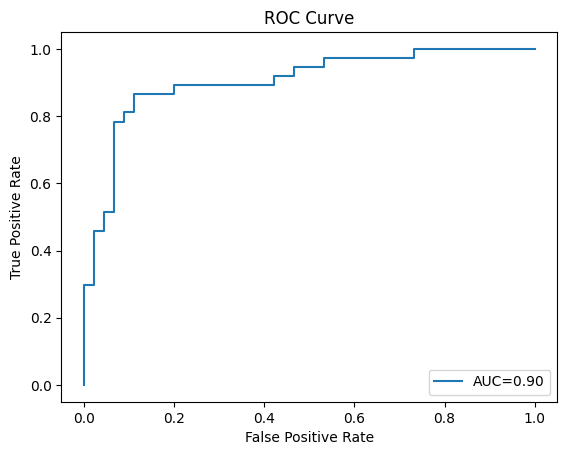

In [49]:
# ROC curve
y_pred_proba = sv_clf.predict_proba(x_test_scaled)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test_ori, y_pred_proba)
auc = metrics.roc_auc_score(y_test_ori, y_pred_proba)

plt.plot(fpr, tpr, label=f"AUC={auc:.2f}")
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()



Nilai AUC sekitar 0,90 menunjukkan bahwa model memiliki kinerja yang baik dalam membedakan antara kelas positif dan negatif.
Semakin tinggi nilai AUC, semakin baik kemampuan model dalam membedakan antara instance positif dan negatif.
Dalam konteks ROC Curve, nilai AUC 0,90 dapat dianggap sebagai kinerja yang sangat baik.

#### 7.4 Decision Tree 

Accuracy: 0.8414634146341463

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.76      0.84        45
           1       0.76      0.95      0.84        37

    accuracy                           0.84        82
   macro avg       0.85      0.85      0.84        82
weighted avg       0.86      0.84      0.84        82



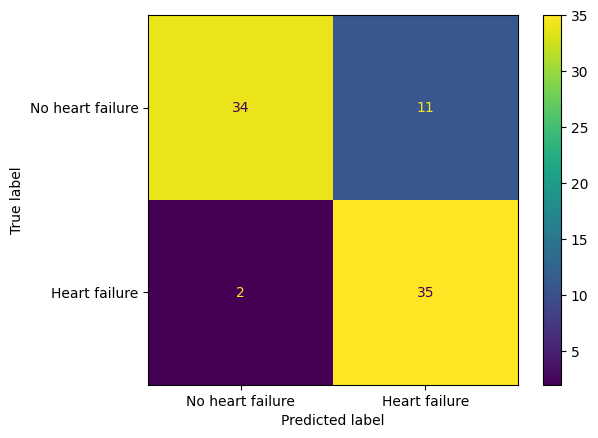

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn import metrics

# Skala data menggunakan StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_ori)
x_test_scaled = scaler.transform(x_test_ori)

# Inisialisasi model Decision Tree
dt_clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=1, criterion='entropy')

# Melatih model menggunakan data latih yang telah discaling
dt_clf.fit(x_train_scaled, y_train_ori)

# Melakukan prediksi pada data uji yang telah discaling
dt_pred = dt_clf.predict(x_test_scaled)

# Evaluasi model
dt_acc = accuracy_score(y_test_ori, dt_pred)
print(f'Accuracy: {dt_acc}')

# Classification Report
print('\nClassification Report:')
print(classification_report(y_test_ori, dt_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_ori, dt_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No heart failure', 'Heart failure'])
cmd.plot()
plt.show()



Berdasarkan evaluasi model Decision Tree, terdapat prediksi terkait dengan Heart Failure. Untuk kelas 1 (mengindikasikan Heart Failure), model memiliki:

    - False Negatives (FN) sebanyak 2, yang berarti ada 2 kasus Heart Failure yang tidak terdeteksi oleh model.
    - True Positives (TP) sebanyak 34, yang berarti ada 34 kasus Heart Failure yang berhasil terdeteksi oleh model.

- Precision (Presisi): Dari semua prediksi positif yang dilakukan oleh model, sekitar 0.76 benar-benar mewakili kasus Heart Failure. Namun, sekitar 0.24 dari prediksi positif tersebut merupakan hasil positif palsu, yang dapat berarti ada risiko mendeteksi kondisi yang sebenarnya tidak terjadi.

- Recall (Sensitivitas): Model dapat mengidentifikasi sekitar 0.95 dari semua kasus Heart Failure yang sebenarnya. Ini menunjukkan kemampuan model untuk mendeteksi keberadaan penyakit jantung pada sebagian besar kasus yang sebenarnya positif.

- F1-Score: Rata-rata harmonik antara precision dan recall adalah sekitar 0.84. Ini menggambarkan keseimbangan antara kemampuan model untuk memberikan prediksi positif yang benar dan mendeteksi sebagian besar kasus yang sebenarnya positif.

- Accuracy (Akurasi): Model dapat melakukan klasifikasi dengan benar pada sekitar 0.84 dari semua kasus. Meskipun akurasi memberikan gambaran keseluruhan, perlu diingat bahwa dalam beberapa kasus (seperti penyakit jantung), mungkin lebih penting untuk fokus pada recall atau precision tergantung pada tujuan spesifik.

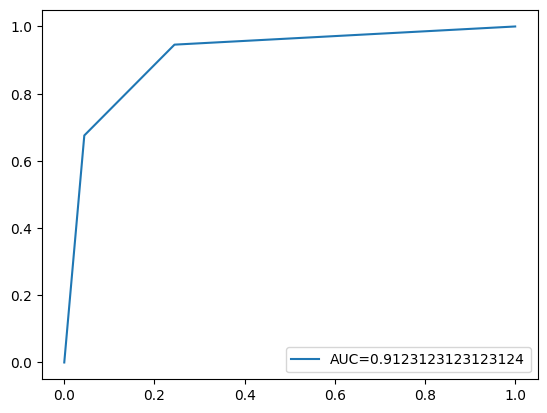

In [51]:
# ROC curve
y_pred_proba = dt_clf.predict_proba(x_test_scaled)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test_ori, y_pred_proba)
auc = metrics.roc_auc_score(y_test_ori, y_pred_proba)
plt.plot(fpr, tpr, label="AUC=" + str(auc))
plt.legend(loc=4)
plt.show()




Nilai AUC sekitar 0,9123 menunjukkan bahwa model memiliki kinerja yang baik dalam membedakan antara kelas positif dan negatif.
Semakin tinggi nilai AUC, semakin baik kemampuan model dalam membedakan antara instance positif dan negatif.
Dalam konteks ROC Curve, nilai AUC 0,9123 dapat dianggap sebagai kinerja yang sangat baik.

#### 7.5 Random Forest

Accuracy: 0.9024390243902439

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.84      0.90        45
           1       0.84      0.97      0.90        37

    accuracy                           0.90        82
   macro avg       0.91      0.91      0.90        82
weighted avg       0.91      0.90      0.90        82



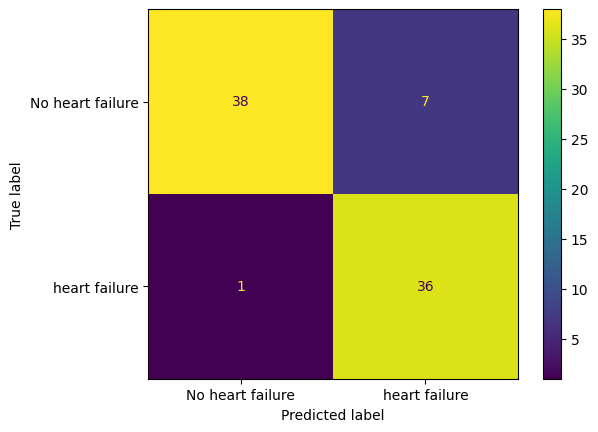

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn import metrics

# Skala data menggunakan StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_ori)
x_test_scaled = scaler.transform(x_test_ori)

# Inisialisasi model Random Forest
r_clf = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)

# Melatih model menggunakan data latih yang telah discaling
r_clf.fit(x_train_scaled, y_train_ori)

# Melakukan prediksi pada data uji yang telah discaling
r_pred = r_clf.predict(x_test_scaled)

# Evaluasi model
r_clf_acc = accuracy_score(y_test_ori, r_pred)
print(f'Accuracy: {r_clf_acc}')
print('\nClassification Report:')
print(classification_report(y_test_ori, r_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_ori, r_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No heart failure', 'heart failure'])
cmd.plot()
plt.show()



Berdasarkan evaluasi model random forest, terdapat prediksi terkait dengan Heart Failure. Untuk kelas 1 (mengindikasikan Heart Failure), model memiliki:

    - False Negatives (FN) sebanyak 1, yang berarti ada 1 kasus Heart Failure yang tidak terdeteksi oleh model.
    - True Positives (TP) sebanyak 38, yang berarti ada 38 kasus Heart Failure yang berhasil terdeteksi oleh model.


- Precision (Presisi): Dari semua prediksi positif yang dilakukan oleh model, sekitar 84% benar-benar mewakili kasus kegagalan jantung. Namun, sekitar 16% dari prediksi positif tersebut merupakan hasil positif palsu, yang dapat berarti ada risiko mendeteksi kondisi yang sebenarnya tidak terjadi.

- Recall (Sensitivitas): Model dapat mengidentifikasi sekitar 97% dari semua kasus kegagalan jantung yang sebenarnya. Ini menunjukkan kemampuan model untuk mendeteksi keberadaan penyakit jantung pada sebagian besar kasus yang sebenarnya positif.

- F1-Score: Rata-rata harmonik antara precision dan recall adalah sekitar 90%. Ini menggambarkan keseimbangan antara kemampuan model untuk memberikan prediksi positif yang benar dan mendeteksi sebagian besar kasus yang sebenarnya positif.

- Accuracy (Akurasi): Model dapat melakukan klasifikasi dengan benar pada sekitar 90% dari semua kasus. Meskipun akurasi memberikan gambaran keseluruhan, perlu diingat bahwa dalam beberapa kasus (seperti penyakit jantung), mungkin lebih penting untuk fokus pada recall atau precision tergantung pada tujuan spesifik.

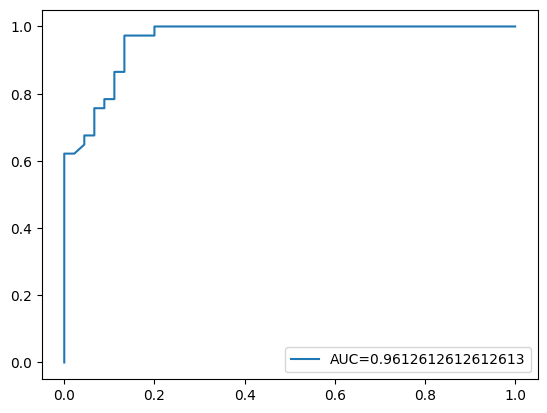

In [53]:
# ROC Curve
y_pred_proba = r_clf.predict_proba(x_test_scaled)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test_ori, y_pred_proba)
auc = metrics.roc_auc_score(y_test_ori, y_pred_proba)
plt.plot(fpr, tpr, label="AUC=" + str(auc))
plt.legend(loc=4)
plt.show()




Nilai AUC sekitar 0,961 menunjukkan bahwa model memiliki kinerja yang baik dalam membedakan antara kelas positif dan negatif.
Semakin tinggi nilai AUC, semakin baik kemampuan model dalam membedakan antara instance positif dan negatif.
Dalam konteks ROC Curve, nilai AUC 0,961 dapat dianggap sebagai kinerja terbaik yang sudah diuji.

#### 7.6 Naive Bayes

Accuracy: 0.8048780487804879

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        45
           1       0.82      0.73      0.77        37

    accuracy                           0.80        82
   macro avg       0.81      0.80      0.80        82
weighted avg       0.81      0.80      0.80        82



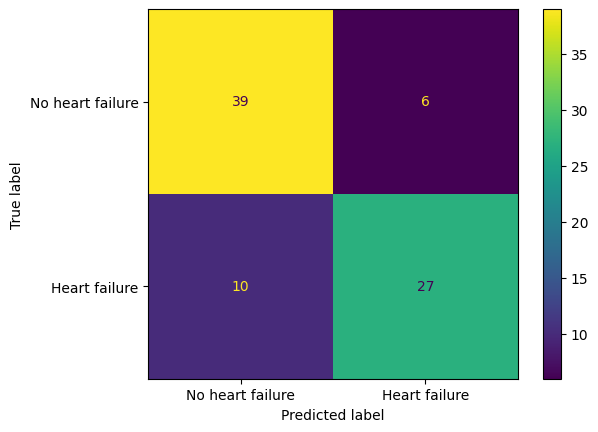

In [54]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Skala data menggunakan StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_ori)
x_test_scaled = scaler.transform(x_test_ori)

# Inisialisasi model Naive Bayes
nb_clf = GaussianNB()

# Melatih model menggunakan data latih yang telah discaling
nb_clf.fit(x_train_scaled, y_train_ori)

# Melakukan prediksi pada data uji yang telah discaling
nb_pred = nb_clf.predict(x_test_scaled)

# Evaluasi model
nb_acc = accuracy_score(y_test_ori, nb_pred)
print(f'Accuracy: {nb_acc}')
print('\nClassification Report:')
print(classification_report(y_test_ori, nb_pred))

# Confusion matrix
nb_cm = confusion_matrix(y_test_ori, nb_pred)
nb_cmd = ConfusionMatrixDisplay(nb_cm, display_labels=['No heart failure', 'Heart failure'])
nb_cmd.plot()
plt.show()




  
Berdasarkan evaluasi model Naive Bayes, terdapat prediksi terkait dengan Heart Failure. Untuk kelas 1 (mengindikasikan Heart Failure), model memiliki: 

    - False Negatives (FN) sebanyak 10, yang berarti ada 10 kasus Heart Failure yang tidak terdeteksi oleh model.
    - True Positives (TP) sebanyak 39, yang berarti ada 39 kasus Heart Failure yang berhasil terdeteksi oleh model.

- Precision (Presisi): Dari semua prediksi positif yang dilakukan oleh model, sekitar 82% benar-benar mewakili kasus kegagalan jantung. Namun, sekitar 18% dari prediksi positif tersebut merupakan hasil positif palsu, yang dapat berarti ada risiko mendeteksi kondisi yang sebenarnya tidak terjadi.

- Recall (Sensitivitas): Model dapat mengidentifikasi sekitar 73% dari semua kasus kegagalan jantung yang sebenarnya. Ini menunjukkan kemampuan model untuk mendeteksi keberadaan penyakit jantung pada sebagian besar kasus yang sebenarnya positif.

- F1-Score: Rata-rata harmonik antara precision dan recall adalah sekitar 77%. Ini menggambarkan keseimbangan antara kemampuan model untuk memberikan prediksi positif yang benar dan mendeteksi sebagian besar kasus yang sebenarnya positif.

- Accuracy (Akurasi): Model dapat melakukan klasifikasi dengan benar pada sekitar 80% dari semua kasus. Meskipun akurasi memberikan gambaran keseluruhan, perlu diingat bahwa dalam beberapa kasus (seperti penyakit jantung), mungkin lebih penting untuk fokus pada recall atau precision tergantung pada tujuan spesifik.


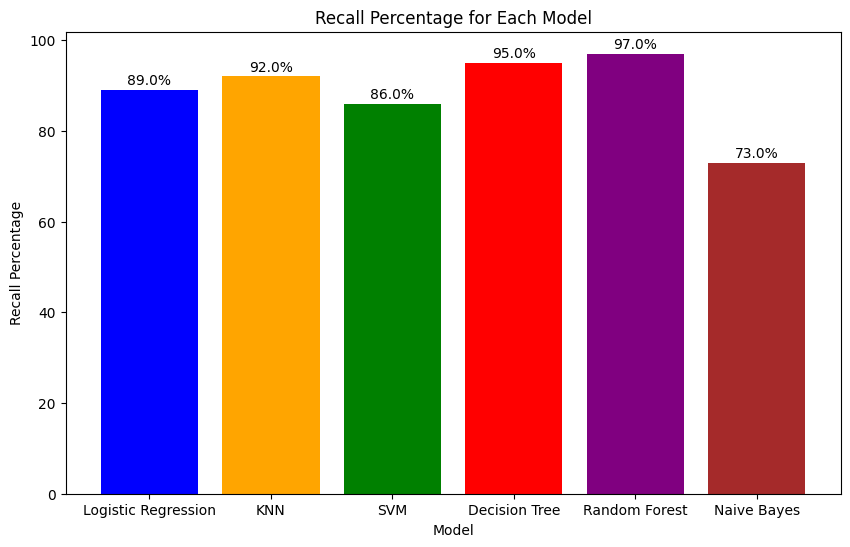

In [55]:
# List model dan nilai recall-nya
models = ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree', 'Random Forest', 'Naive Bayes']
recall_values = [0.89, 0.92, 0.86, 0.95, 0.97, 0.73]

# Mengubah nilai recall menjadi persentase
recall_values_percent = [round(value * 100, 2) for value in recall_values]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, recall_values_percent, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f'{round(yval, 2)}%', ha='center', va='bottom', fontsize=10)

plt.xlabel('Model')
plt.ylabel('Recall Percentage')
plt.title('Recall Percentage for Each Model')
plt.show()


Dari hasil tersebut, dapat kita lihat bahwa model Random Forest memiliki nilai recall tertinggi (0.97), yang berarti model tersebut sangat baik dalam mendeteksi kasus positif. Diikuti oleh Decision Tree dengan nilai recall sebesar 0.95. Kedua model ini menunjukkan kinerja yang sangat baik dalam meminimalkan jumlah kasus positif yang terlewatkan.

Sementara itu, model KNN dan Logistic Regression juga menunjukkan performa yang baik dengan nilai recall masing-masing sebesar 0.92 dan 0.89. Sedangkan model SVM memiliki nilai recall yang sedikit lebih rendah, yaitu sebesar 0.86. Terakhir, model Naive Bayes memiliki nilai recall yang paling rendah di antara semua model dengan nilai 0.73.

# H. Model Inference

In [56]:
model_inference = {
    'age': [20,30,40,50],
    'anaemia': [0,0,1,1],
    'creatinine_phosphokinase': [130,21,146,123],
    'diabetes': [0,0,0,1],
    'ejection_fraction': [5,6,8,3],
    'high_blood_pressure': [0,0,1,1],
    'platelets': [166,61,54,71],
    'serum_creatinine': [18,24,1,16],
    'serum_sodium': [11,17,17,5],
    'sex': [0,1,1,1],
    'smoking': [0,1,1,1],
    'day': [30,30,30,30]
}

model_inference = pd.DataFrame(model_inference)
model_inference


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,day
0,20,0,130,0,5,0,166,18,11,0,0,30
1,30,0,21,0,6,0,61,24,17,1,1,30
2,40,1,146,0,8,1,54,1,17,1,1,30
3,50,1,123,1,3,1,71,16,5,1,1,30


In [57]:
# Inisialisasi model Random Forest
r_clf = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)

# Melatih model menggunakan data latih yang telah discaling
r_clf.fit(x_train_scaled, y_train_ori)

# Lakukan prediksi pada data baru (model_inference)
new_data_inference = r_clf.predict(model_inference)
print(new_data_inference)

[0 0 0 0]


# I. Evaluation Model


Diatas sudah dilakukan pemodelan sekaligus telah dievaluasi dengan menggunakan berbagai metrik, seperti akurasi, presisi, recall, skor F1, kurva ROC, dan matriks konfusi, memiliki tujuan utama untuk mendapatkan pemahaman yang lebih baik tentang kinerja model yang telah dikembangkan. 
Berikut adalah penjelasan mengenai alasan mengapa setiap metrik tersebut digunakan:

    - Akurasi (Akurasi):
 Mengukur sejauh mana model mampu memprediksi kelas dengan benar secara keseluruhan.
 Memberikan gambaran umum tentang kinerja model, tetapi perlu diperhatikan bahwa akurasi mungkin tidak mencerminkan kualitas model secara keseluruhan jika distribusi kelas tidak seimbang.

    - Presisi (Presisi):
 Mengukur sejauh mana model mampu mengidentifikasi kelas positif dengan benar. Berguna ketika fokus pada pengenalan kelas tertentu. Menunjukkan berapa persen dari prediksi positif yang sebenarnya benar dari semua prediksi positif.
 
    - recall(Sensitivitas):
Mengukur sejauh mana model mampu menemukan semua instance dari kelas positif yang sebenarnya. Penting ketika tujuan utama adalah mengidentifikasi sebanyak mungkin instance dari kelas positif. Memberikan persentase dari instance positif yang ditemukan dari total instance positif yang sebenarnya.

    - f1-score :
Merupakan perpaduan harmonis antara presisi dan recall. Berguna untuk mencapai keseimbangan antara presisi dan ketangkapan model. Dapat menjadi pilihan yang baik jika tidak ingin terlalu fokus pada satu aspek saja.

    - Kurva ROC :
Mengukur kinerja model pada berbagai pengklasifikasian ambang batas.Membantu memahami trade-off antara True Positive Rate (Recall) dan False Positive Rate. Area di bawah kurva ROC (AUC-ROC) dapat memberikan indikasi seberapa baik model dapat membedakan antara kelas-kelas.

    - Matriks confusion :
Menampilkan jumlah True Positive, True Negative, False Positive, dan False Negative. Memberikan gambaran rinci tentang model kinerja. Berguna untuk menganalisis jenis-jenis kesalahan yang mungkin terjadi, memahami distribusi kelas, dan menyebarkan model kinerja pada setiap kelas secara individu.


Dengan menggunakan berbagai metrik ini, model evaluasi menjadi lebih holistik dan dapat memberikan wawasan yang mendalam tentang seberapa baik model dapat memenuhi tujuannya. Setiap metrik memberikan perspektif yang berbeda dan membantu pemahaman yang lebih baik tentang kekuatan dan kelemahan model.


# J. Conclusion

Conclusion yang dapat kami capai mengenai project ensemble model ini yaitu :

- Melalui analisis proyek ini menggunakan dataset "heart_failure_clinical_records_dataset.csv" dengan 299 entitas dengan 13 atribut yang berpotensi memiliki risiko terkena gagal jantung. Semua atribut seperti usia, anemia, tekanan darah tinggi, dan faktor-faktor lainnya menjadi poin fokus dalam analisis.

- Lalu, kami melakukan analisis yang berfokus pada pembersihan dan persiapan data, penggunaan teknik ensemble model, terutama model Random Forest, dan evaluasi kinerja model. 

- Pada proses pengolahan data gagal jantung yang telah dilakukan, langkah-langkahnya mencakup pembersihan data untuk mengatasi nilai yang kosong dan missing value, serta deteksi dan penanganan outlier. Setelah itu, dilakukan normalisasi data dengan membagi data secara bersamaan dengan Interquartile Range (IQR) untuk menghilangkan nilai ekstrem. Meskipun normalisasi dilakukan, keputusan tetap diambil untuk menggunakan data asli dalam pemodelan, dengan alasan bahwa orisinalitas data memiliki nilai penting. Kematian data dapat mempengaruhi hasil akhir, sehingga mempertahankan integritas asli data dianggap lebih krusial.

- Pemilihan model melibatkan beberapa metode, seperti regresi logistik, k-nearest neighbors, support vector machine (SVM), decision tree, random forest, dan naive Bayes. Setelah itu, dilakukan evaluasi model menggunakan metrik seperti akurasi, presisi, recall, F1-score, area under the ROC curve (AUC-ROC), dan matriks konfusi. Hasil evaluasi menunjukkan bahwa model random forest memberikan performa terbaik dalam konteks data gagal jantung ini.

- Pentingnya memilih antara recall, presisi, dan akurasi pada korelasi evaluasi dapat disebabkan oleh faktor-faktor tertentu. Dalam konteks data gagal jantung, mungkin dipilihnya recall atau presisi lebih disukai daripada akurasi karena alasan tertentu. Misalnya, recall yang tinggi akan fokus pada kemampuan model untuk mengidentifikasi sebanyak mungkin kasus positif, yang mungkin lebih kritis dalam penanganan kondisi medis seperti gagal jantung. Presisi, di sisi lain, menyoroti keakuratan model dalam mengidentifikasi kasus positif, mengurangi kemungkinan hasil positif palsu. Pilihan antara recall dan presisi bergantung pada prioritas spesifik dan konsekuensi dari masing-masing jenis kesalahan pada kasus tertentu.

- untuk hasilnya sediri  dapat kita lihat bahwa model Random Forest memiliki nilai recall tertinggi (0.97), yang berarti model tersebut sangat baik dalam mendeteksi kasus positif. Diikuti oleh Decision Tree dengan nilai recall sebesar 0.95. Kedua model ini menunjukkan kinerja yang sangat baik dalam meminimalkan jumlah kasus positif yang terlewatkan. Sementara itu, model KNN dan Logistic Regression juga menunjukkan performa yang baik dengan nilai recall masing-masing sebesar 0.92 dan 0.89. Sedangkan model SVM memiliki nilai recall yang sedikit lebih rendah, yaitu sebesar 0.86. Terakhir, model Naive Bayes memiliki nilai recall yang paling rendah di antara semua model dengan nilai 0.73.


Secara keseluruhan, hubungan antara machine learning dan analisis data pada kasus gagal jantung menunjukkan bahwa pendekatan ini dapat memberikan wawasan yang berharga dalam pemahaman, prediksi, dan penanganan kondisi medis tersebut. Penggunaan machine learning dalam analisis data gagal jantung memungkinkan kita untuk mengatasi kompleksitas dan volume data yang besar, serta memodelkan pola-pola yang mungkin sulit terdeteksi secara manual






    

